In [26]:
import numpy as np
from scipy.stats import chi2
from scipy.stats import t
from scipy.stats import f
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

### 卡方分布

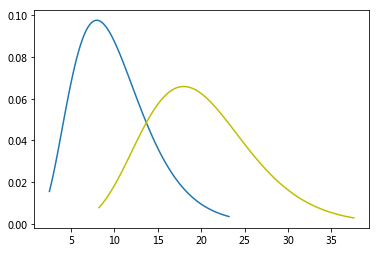

In [15]:

dof=10
x1=np.linspace(chi2.ppf(0.01,dof),chi2.ppf(0.99,dof),100)
x2=np.linspace(chi2.ppf(0.01,20),chi2.ppf(0.99,20),100)
plt.plot(x1,chi2.pdf(x1,dof))
plt.plot(x2,chi2.pdf(x2,20),color='y')

### t分布

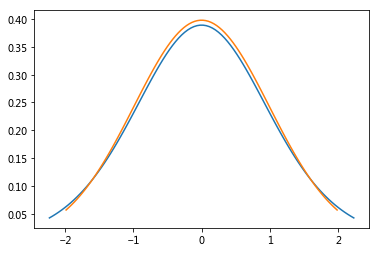

In [37]:
x1=np.linspace(t.ppf(0.025,10),t.ppf(0.975,10),100)
x2=np.linspace(t.ppf(0.025,100),t.ppf(0.975,100),100)
plt.plot(x1,t.pdf(x1,10))
plt.plot(x2,t.pdf(x2,100))

#### 单变量t检验 零假设:一列数据的均值与0是否相同¶

In [52]:
# t检验
# 使用ttest_1samp()函数可以进行单样本T检验，比如检验一列数据的均值与0的差异是否显著
data=x1
# data=np.arange(-1,3,0.01)
stats.ttest_1samp(data,0)

Ttest_1sampResult(statistic=-1.7003295757657607e-15, pvalue=0.9999999999999987)

In [ ]:
#当两总体方差相等时，即具有方差齐性，可以直接检验
data1=np.linspace(t.ppf(0.01,10),t.ppf(0.99,10),100)
data2=np.linspace(t.ppf(0.01,20),t.ppf(0.99,20),100)

#### 两变量t检验   零假设:两个样本是否具有相同的均值

In [46]:
stats.ttest_ind(data1,data2)#不能拒绝原假设，可以认为均值相同

Ttest_indResult(statistic=1.2542447887131235e-15, pvalue=0.999999999999999)

In [35]:
# 当不确定两总体方差是否相等时，应先利用levene检验，检验两总体是否具有方差齐性。
data3=np.linspace(norm.ppf(0.01),norm.ppf(0.99),100)
stats.levene(data1,data3)
# 如果返回结果的p值远大于0.05，那么我们认为两总体具有方差齐性。

# 如果两总体不具有方差齐性，需要加上参数equal_val并设定为False。
stats.ttest_ind(data1,data2,equal_var=False)

Ttest_indResult(statistic=1.2542447887131235e-15, pvalue=0.999999999999999)

### F分布

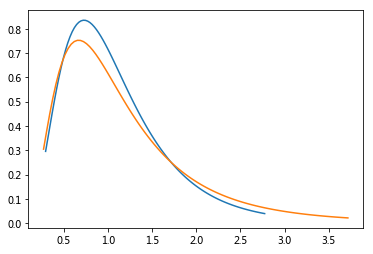

In [81]:
x1=np.linspace(f.ppf(0.025,10,20),f.ppf(0.975,10,20),100)
x2=np.linspace(f.ppf(0.025,10,10),f.ppf(0.975,10,10),100)
plt.plot(x1,f.pdf(x1,10,20))
plt.plot(x2,f.pdf(x2,10,10))

#### F检验  原假设：两样本的方差相同（样本符合正态分布）

In [90]:
data1=5*np.random.randn(10)+10
data2=5*np.random.randn(10)+12

In [96]:
# stats.f_oneway(x1,x2) # p值很小，拒绝原假设，因此两样本方差不同
stats.f_oneway(data1,data2)# p值大，不能拒绝原假设，因此两样本方差相同（25）

F_onewayResult(statistic=2.779097974767641, pvalue=0.11280643807931764)

In [92]:
np.std(data1),np.std(data2)

(3.3498990287158605, 3.3344064946297176)

In [95]:
cv=f.ppf(0.95,1,len(data1)+len(data2)-2)
cv

4.413873419170566